# 確率・統計の基本

Python にも慣れたところで，本題の確率・統計についての説明に入ろう．
なお，この資料を作るにあたっていろいろな資料を参考にしたが，説明や例題作成の大部分は

> Bruce Frey 著，鴨澤 眞夫 監訳，西沢 直木 訳，"Statistics Hacks — 統計の基本と世界を測るテクニック"，オライリー・ジャパン，2007年．

を参考にした．

まずは確率の世界の基本法則，大数の法則と中心極限定理を中心に基礎を説明する．

## 基本用語

JISの統計用語 (JIS Z8101-1，ISO 3534-1に対応) に従うと，以下のように書ける．

- **母集団 (population)** — 検討の対象となるアイテムの全体．
- **サンプリング単位** — 母集団を分割した最小単位．
- **標本，試料 (sample)** — 1つ以上のサンプリング単位からなる母集団の部分集合．
- **観測値，測定値 (observed value)** — サンプルのある要素に関して観測された値．

標本は母集団の統計的性質を反映したものであり，どのようにサンプリングされたかが重要である．
一方で観測値はどのように取得したかを問題にしない．つまり統計的性質を気にしないという違いがある．
さしあたり標本と観測値の違いは置いておいて，母集団と標本だけ考えていくことにする．
"Statistics Hacks" では **スコア** と書くことで標本と観測値の違いをうまくあいまいにしている (ような気がする)．

**観測値の集合**に対して数値的要約 (平均，標準偏差など) を求めるのを**記述統計 (descriptive statistics)** と呼ぶ．
つまり，既知のスコアの性質を調べることである．
一方で，標本から母集団の性質を推測するのが**推測統計 (inferential staitstics)** と呼ぶ．

## 基本法則

統計をやるときに「とりあえず標本を増やせばいい」という考えの根拠になる2つの基本法則を確かめよう．

- **大数の法則** — 母集団から無作為抽出した標本の平均は，標本のサイズを大きくすると母集団の平均 (母平均) に収束する
- **中心極限定理** — 標本平均と母平均の誤差は，標本のサイズを大きくしたとき**正規分布**に収束する

混同していたり同じものだと思っている人が結構いるが，別の法則である．また，統計の大原則のように思われがちだが，大数の法則が成立しない分布 (コーシー分布) や中心極限定理が正規分布に収束しない場合がないわけではない．ただ，そういう難しい話はだいたい現代統計学の範疇なので，古典統計では気にしなくてもたぶん問題はない．

そんなことより忘れがちで大事はことは，中心極限定理は**母集団の分布が正規分布かどうかに関わらず**成立するということだ．準備運動で使った屋久島の月別降水量を使って確かめよう．もう一度ヒストグラムを出してみると，

In [2]:
import numpy as np
from matplotlib import pyplot

data = np.loadtxt("./dat/yakushima-rain-month.txt", usecols=range(1,13))

pyplot.hist(data.flatten())
pyplot.show()

print("Average = %.1f" % data.mean())

<Figure size 640x480 with 1 Axes>

Average = 348.4


どうも正規分布っぽくない．(正規分布がどういうものかの詳細は後で．)

まずは大数の法則を確かめよう．ランダムサンプリングの回数を増やしていって，標本平均がどう変化するかをプロットしてみる．`numpy` を使えばわざわざ乱数を用意してあれこれしなくても簡単にランダムサンプリングができる．

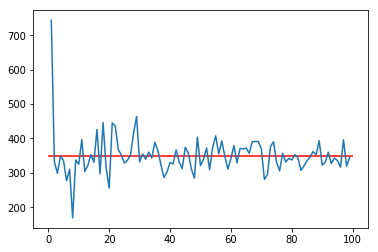

In [3]:
Nmax = 100

x = []
y = []

population = np.loadtxt("./dat/yakushima-rain-month.txt", usecols=range(1,13))

for N in range(1, Nmax):
    sample = np.random.choice(population.flatten(), N, replace=False)
    x.append(N)
    y.append(sample.mean())
    
pyplot.plot(x,y)
pyplot.hlines([population.mean()], 0, Nmax, "red")
pyplot.show()

$N=100$ だと収束しきっていない感じだが，$Nmax$を増やすと収束の様子が見える．$Nmax$を増やして結果を観察しよう．ちなみに母集団の要素数は972なので$Nmax$の上限は972だ．

次に中心極限定理を確かめる．母集団から$N$個の標本を無作為抽出して，その標本群と母平均との差の平均値を求める，という操作を$Ndist$回試行してヒストグラムを描くプログラムである．(言葉で書くとややこしい)

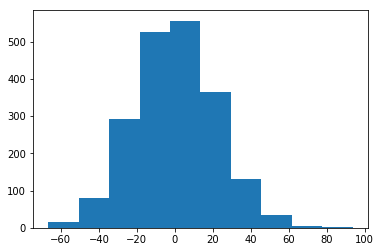

In [4]:
N = 100
Ndist = 2000

val = []

population = np.loadtxt("./dat/yakushima-rain-month.txt", usecols=range(1,13))
ave = population.mean()

for i in range(1, Ndist):
    sample = np.random.choice(population.flatten(), N, replace=False)
    val.append(sample.mean() - ave)
    
pyplot.hist(val)
pyplot.show()

$N=1$だと元の分布形状が見えるが，$N$を大きくしていくとだんだん分布形状が左右対象になり，正規分布に近づいていくことが分かる．これが中心極限定理である．

## 正規分布の前に

説明を飛ばしていた正規分布について詳しく見ていこう．教科書なんかには，

> 正規分布 (またはガウス分布) とは確率密度関数$f(x)$が平均$\mu$と分散$\sigma^2$を使って
> $$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
> で記述される分布で，$N(\mu, \sigma^2)$と書く．

という感じで書かれている．(Wikipedia にはそう書かれている．)
では平均 $\mu$ と標準偏差 $\sigma$ (2乗した$\sigma^2$が分散)は何者なのか？

### 平均 (mean)

「平均」にもいろいろある，という話は置いておいて，算術平均 (相加平均) を考える．
算術平均は言うまでもなく
$$\mu = \frac{1}{N}\sum_{i=1}^N x_i = \frac{x_1 + x_2 + \cdots + x_N}{N}$$
だが，この計算の意味は何だろうか？

平均値$\mu$は，「全ての要素からの距離が最小になる点」になっている．距離とは何か？ を考え始めるとそれはまた難しいので二乗偏差の総和を最小化する，と言いかえてもいい．

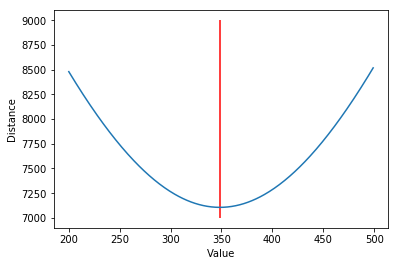

In [5]:
import math

population = np.loadtxt("./dat/yakushima-rain-month.txt", usecols=range(1,13))

x = []
y = []
ave = population.mean()

for a in range(200,500):
    d = 0
    for s in population.flatten():
        d += abs(s - a)**2
        
    x.append(a)
    y.append(math.sqrt(d))

pyplot.plot(x,y)
pyplot.xlabel("Value")
pyplot.ylabel("Distance")
pyplot.vlines([ave], 7e3, 9e3, "red")
pyplot.show()

### 余談： average と mean

「平均」はよく average と書くが，これは「中心傾向を表す代表値」というやや漠然としたもので，厳密に平均値を表すときは mean と書く．例えば RMS (二乗平均平方根) は Root Mean Square だ．中心傾向を表す値としては他にも中央値 (median) や最頻値 (mode) もある．ただ，正規分布であれば mean も median も mode も等しくなるので，あまり気にしない．

### 標準偏差

標準偏差は「平均値との距離の平均」に相当する．

### 余談：定義が違う？

「標準偏差」の定義は本によって違うことがある．

なお，python の `numpy.std()` は $n$，その他の言語やExcel はだいたい $n-1$で計算するのでちょっと注意が必要かもしれない．ちなみに同じ python の `pandas.std()` は $n-1$で計算する．`statistics` では $n$ で計算する `pstdev()` と $n-1$ で計算する `stdev()` が用意されている．(オプション ddof をつければ `numpy.std()` を $n-1$で計算させることも，`pandas.std()` を $n$ で計算させることもできる．)

## 正規分布

### 中心極限定理の再確認

中心極限定理の確認で表示したヒストグラムに正規分布のグラフを重ねて，どのぐらい正規分布かをもう少し詳しく見られるようにしてみよう．
他にうまいやり方があるのかも知れないが，確率密度関数 `scipy.stats.norm.pdf()` を使ってグラフを描くために，ヒストグラムのビンの幅を固定したりごちゃごちゃやっている．$N$ を大きくしていくと，ヒストグラムと正規分布のグラフが重なっていくことが確認できるだろう．

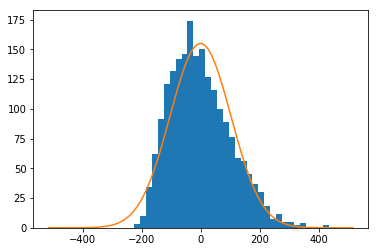

In [6]:
from scipy.stats import norm

N = 5
Ndist = 2000
binwidth = 20

val = np.array([])

population = np.loadtxt("./dat/yakushima-rain-month.txt", usecols=range(1,13))
ave = population.mean()

for i in range(1, Ndist+1):
    sample = np.random.choice(population.flatten(), N, replace=False)
    val = np.append(val, sample.mean() - ave)

x = np.arange(-5 * val.std(), 5 * val.std(), 1)
pyplot.hist(val, bins=np.arange(min(val), max(val) + binwidth, binwidth))
pyplot.plot(x, norm.pdf(x, val.mean(), val.std()) * Ndist * binwidth)
pyplot.show()

### どのぐらい正規分布か — 尖度，歪度

上の例ではヒストグラムと正規分布がどのぐらい似ているか，主観的に評価した．定量的に「どのぐらい正規分布しているか」を評価したければ，いくつかの指標を使うことができる．平均値$\mu$と分散$\sigma$で正規化した標準化確率変数$Z$
$$Z=\frac{x - \mu}{\sigma}$$
に対して，3次のモーメント (期待値)を**歪度 (skewness)**，4次のモーメント (から3を引いたもの)を**尖度 (kurtosis)**と呼ぶ．
$$歪度 = E\left[Z^4\right]=E\left[\frac{(x - \mu)^4}{\sigma^4}\right] = \frac{E\left[(x-\mu)^4\right]}{\sigma^4},$$
$$尖度 = E\left[Z^3\right] - 3=E\left[\frac{(x - \mu)^3}{\sigma^3}\right] -3 = \frac{E\left[(x-\mu)^3\right]}{\sigma^3} - 3,$$
ただし$E(x)$は期待値である．この2つが0に近いほど正規分布に近いと言える．(尖度の $-3$ は正規分布で値を0にするための補正)

歪度は分布の偏りを示し，正の値であれば左側に，負の値であれば右側に偏っていることを表す．
尖度は正であれば分布がより平均値付近に集中し，負であれば分布の裾野が広いことを表す (分散の大小とは異なることに注意)．

ちなみに歪度も尖度も定義できないことがある．例えばコーシー分布のように，期待値が発散する分布では定義ができない．

ちなみに，分布の形状でなぜ期待値が出てくるのか？ と思うかも知れないが，平均が重心に対応するように期待値はモーメントに相当するので，
期待値は分布の偏りに関係するためだ．

Python で尖度，歪度は `scipy.stats` の中の `skew()`，`kurtosis()` で求めることができる．サンプル数$N$を増やしていったときに尖度と歪度がどう変化するかを調べてみよう．

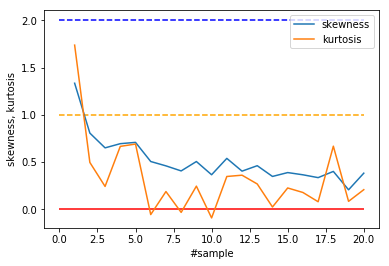

In [17]:
import scipy

N = 1
Nmax = 20
Ndist = 2000

val = []
x = []
ys = []
yk = []

population = np.loadtxt("./dat/yakushima-rain-month.txt", usecols=range(1,13))
ave = population.mean()

for s in range(1, Nmax+1):
    val = []
    for i in range(1, Ndist+1):
        sample = np.random.choice(population.flatten(), s, replace=False)
        val.append(sample.mean() - ave)

    x.append(s)
    ys.append(scipy.stats.skew(val))
    yk.append(scipy.stats.kurtosis(val))
    
pyplot.plot(x, ys, label="skewness")
pyplot.plot(x, yk, label="kurtosis")
pyplot.hlines([0], 0, Nmax, "red")
pyplot.hlines([1], 0, Nmax, "orange", linestyle="dashed")
pyplot.hlines([2], 0, Nmax, "blue", linestyle="dashed")
pyplot.legend()
pyplot.xlabel("#sample")
pyplot.ylabel("skewness, kurtosis")
pyplot.show()

順調に尖度，歪度ともに0に向かっているので，中心極限定理は正しそうだ．「**尖度・歪度がどの程度の値であれば正規分布と見なしてよいか**」という基準については諸説あるようで，$-1 < 歪度 < 1$，$-2 < 尖度 < 2$ がよく言われているようだ．この例で言えば$N=2$でもう正規分布と見なしてよいということになる．ヒストグラムがけっこう歪んでいても正規分布として取り扱ってもあまり問題はないらしい．

正規分布かどうかの判定には**正規性の検定**というのがあるのだが，もう少し別の知識が必要なのでこれについては後でやることにする．

## 中心極限定理を使う

中心極限定理を使うと，標本群がどういう母集団から抽出されたかを推測することができる．例えば屋久島の降水量が鹿児島県内の降水量から見てどのぐらい特殊か，を評価することができる．

`./dat/kagoshima-rain-year.txt` は1978年～2018年の41年間に屋久島を含む鹿児島県内の26地点で記録された年間降水量 (気象庁提供) である．とりあえずヒストグラムを見てみよう．青が屋久島，オレンジが鹿児島全体，青線が屋久島の平均，赤線が鹿児島全体の平均である．予想通り，屋久島はかなり雨が多いようだ．

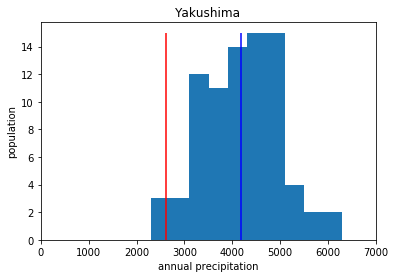

#sample: 81, mean: 4180, sigma: 785.53, skew: 0.028, kurtosis: -0.054


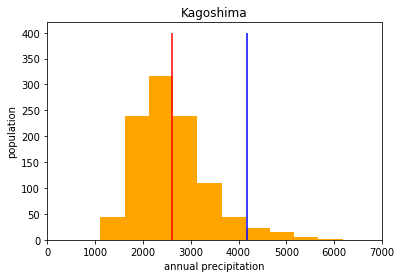

#sample: 1040, mean: 2614, sigma: 740.05, skew: 1.100, kurtosis: 1.740


In [8]:
import scipy

yakushima = np.loadtxt("./dat/yakushima-rain-year.txt", usecols=[1])
kagoshima = np.loadtxt("./dat/kagoshima-rain-year.txt", usecols=range(1, 27))

y_ave = yakushima.mean()
k_ave = kagoshima.mean()

pyplot.xlim([0, 7000])
pyplot.xlabel("annual precipitation")
pyplot.ylabel("population")
pyplot.hist(yakushima)
pyplot.vlines(y_ave, 0, 15, "blue")
pyplot.vlines(k_ave, 0, 15, "red")
pyplot.title("Yakushima")
pyplot.show()

print("#sample: %d, mean: %d, sigma: %.2f, skew: %.3f, kurtosis: %.3f" % (yakushima.size, yakushima.mean(), yakushima.std(), scipy.stats.skew(yakushima), scipy.stats.kurtosis(yakushima)))

pyplot.xlim([0, 7000])
pyplot.xlabel("annual precipitation")
pyplot.ylabel("population")
pyplot.hist(kagoshima.flatten(), color="orange")
pyplot.vlines(y_ave, 0, 400, "blue")
pyplot.vlines(k_ave, 0, 400, "red")
pyplot.title("Kagoshima")
pyplot.show()

print("#sample: %d, mean: %d, sigma: %.2f, skew: %.3f, kurtosis: %.3f" % (kagoshima.size, kagoshima.mean(), kagoshima.std(), scipy.stats.skew(kagoshima.flatten()), scipy.stats.kurtosis(kagoshima.flatten())))

ただ，これはひょっとしたら標本の取り方でたまたま偏っているだけかも知れない．(80個も標本を取ってそんなにずれるはずがない，と思うだろうがとりあえずそう疑っておく．) 尖度と歪度は十分に小さいので，屋久島の標本は正規分布していると見てよさそうだ．(標本の)平均値は 4180，(標本の)標準偏差は 786 となっている．分布の細かな形状はさておき，標本平均 (標本値のばらつきではなく標本**平均**のばらつきという点に注意) がサンプリングによってどのぐらいばらつくかは
$$\frac{\sigma}{\sqrt{N}}$$
で計算でき，これを**標本平均の標準誤差**と呼ぶ．屋久島の分布で計算すると，$785.5/\sqrt{81} = 87.3$ となる．

つまり，「本当は屋久島の年間降水量の平均は2614 mmなのに標本の取り方でたまたま4180 mmになってしまった」という確率は，平均値が$\sigma\times(4180 - 2614)/87.3 = 18\sigma$ ずれる確率に等しい，ということになる．ちなみに正規分布で標本が$\pm18\sigma$ずれる確率はだいたい$10^{143}$分の1である．


### 注1

標本平均の標準誤差の定義はより正確には，要素数$N$の母集団から$n$個の標本を抽出し，その標本の標準偏差が$\sigma$のとき，
$$\sqrt{\frac{N - n}{N}}\frac{\sigma}{\sqrt{n}}$$
である．$N$が十分大きいとすると $\sigma/\sqrt{n}$ となる．

### 注2

上の例は標本が無作為抽出でないとかいろいろ突っこみどころがあるので注意されたし．

## 大数の法則

標本の性質は母集団の性質と必ずしも一致するわけではない．サイコロの目が等しい確率で出るからと言って，6回振れば1から6の目が必ず1回ずつ出るわけではないし，1%の確率で当たりがでるくじは100回引けば必ず当たるわけでもない．

母集団の性質と，標本の性質の差 (の比率) は
$$ \frac{1}{\sqrt{samples}}$$
で表される．つまり標本数の平方根で差は減っていく．これが大数の法則である．

## 演習

1%の確率で大当りの出るくじを模擬するコードを書き，
- 「1回目の大当りが出るまでの試行回数」の分布
- 標本内の大当り確率が1%に十分に近づくには試行回数は何回ぐらい必要か
などを調べよ．

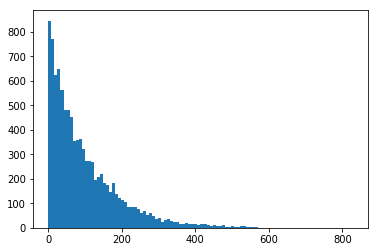

In [15]:
import random

Ns = 10000
x = []

for t in range(Ns):
    for i in range(10000):
        if (random.random() < 0.01):
            break
    x.append(i)

pyplot.hist(x, bins=100)
pyplot.show()